## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [7]:
## 確認硬體資源 (如果你是在 Linux)
#!nvidia-smi

# 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)

#或直接在命令提示字元中察看:
#nvidia-smi
#nvidia-smi.exe -h



In [26]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [9]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [27]:
## 資料前處理
## 每筆資料的 min/max 進行標準化至 -1 ~ 1 
"""
Your code here
"""
def preproc_x(x, flatten=True):

    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5) 
  # 舉例來說，最大值100、最小值0時，標準化尺寸縮小至-1~1，即將本來的全距100縮至2
  # 原本的值若為54，即本來與最小值的差距為54，今天縮至本來全距的0.02倍，此差距就變成了54*0.02=1.08
  # 故新的值就是-1+1.08=0.08
  # 寫成公式: -1 + (x - x.min()) * ((1 - (-1)) / (x.max() - x.min()))
  # 對照公式: -1 + (54-0)*(2/(100-0))= (-1)+54*0.02=0.08
  
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128,128, 64, 64, 32]): 
  #第一層隱藏層有512個神經元、第二層有256個、第三層有256個......
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons): #設定隱藏層
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)#第一層
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x) #第二層、第三層....
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.Model(inputs=[input_layer], outputs=[out])
    
    return model


In [30]:
print(x_train.shape)
print(x_train.shape[1:])

(50000, 3072)
(3072,)


In [31]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)               

In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [33]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [34]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 10s 53ms/step - loss: 1.7881 - accuracy: 0.3647 - val_loss: 1.5871 - val_accuracy: 0.4382
Epoch 2/100
196/196 [==============================] - 10s 51ms/step - loss: 1.5199 - accuracy: 0.4634 - val_loss: 1.4586 - val_accuracy: 0.4906
Epoch 3/100
196/196 [==============================] - 10s 52ms/step - loss: 1.3994 - accuracy: 0.5070 - val_loss: 1.4189 - val_accuracy: 0.4975
Epoch 4/100
196/196 [==============================] - 10s 53ms/step - loss: 1.2986 - accuracy: 0.5435 - val_loss: 1.3818 - val_accuracy: 0.5165
Epoch 5/100
196/196 [==============================] - 10s 51ms/step - loss: 1.2168 - accuracy: 0.5735 - val_loss: 1.3766 - val_accuracy: 0.5133
Epoch 6/100
196/196 [==============================] - 10s 51ms/step - loss: 1.1373 - accuracy: 0.6009 - val_loss: 1.3460 - val_accuracy: 0.5331
Epoch 7/100
196/196 [==============================] - 10s 52ms/step - loss: 1.0667 - accuracy: 0.6241 - val_loss: 1.3782 - val_ac

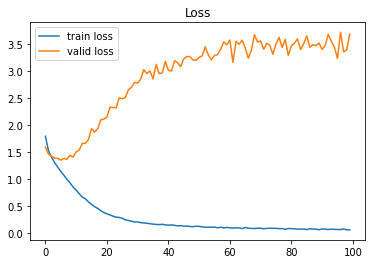

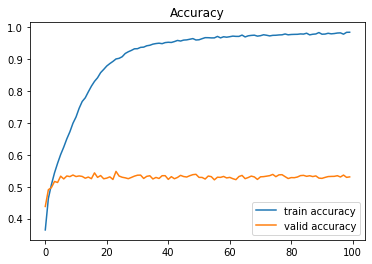

In [35]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()